In [1]:
#Importing necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
dataset = "C:\\Users\\Lampe\\Desktop\\sentiment analysis\\dataset\\dataset.csv"

In [3]:
import chardet
with open(dataset, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7290615013529563, 'language': ''}

In [4]:
data=pd.read_csv(dataset,encoding='Windows-1252')

In [5]:
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


C:\Users\Lampe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

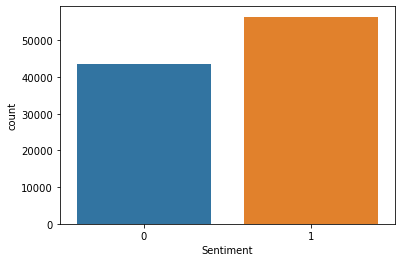

In [6]:
#Basic visualization of the data
sns.countplot(data['Sentiment'])

In [7]:
#Removing Punctuation
punc = string.punctuation
plist = punc
def rempunc(text):
    trans = str.maketrans('', '', plist)
    return text.translate(trans)
data['SentimentText']= data['SentimentText'].apply(lambda x: rempunc(x))

In [8]:
data.head()
data

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend
1,2,0,I missed the New Moon trailer
2,3,1,omg its already 730 O
3,4,0,Omgaga Im sooo im gunna CRy Ive be...
4,5,0,i think mi bf is cheating on me TT
...,...,...,...
99984,99996,0,Cupcake seems like a repeating problem hope...
99985,99997,1,cupcake arrrr we both replied to each other ov...
99986,99998,0,CuPcAkE2120 ya i thought so
99987,99999,1,CupcakeDollie Yes Yes Im glad you had more fun...


In [9]:
#Removing Hashtags and Mentions
def removemenandhash(text):
    items = ['@','#']
    for separator in  string.punctuation:
        if separator not in items :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in items:
                words.append(word)
    return ' '.join(words)
data['SentimentText']= data['SentimentText'].apply(lambda x: removemenandhash(x))

In [10]:
data

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend
1,2,0,I missed the New Moon trailer
2,3,1,omg its already 730 O
3,4,0,Omgaga Im sooo im gunna CRy Ive been at this d...
4,5,0,i think mi bf is cheating on me TT
...,...,...,...
99984,99996,0,Cupcake seems like a repeating problem hope yo...
99985,99997,1,cupcake arrrr we both replied to each other ov...
99986,99998,0,CuPcAkE2120 ya i thought so
99987,99999,1,CupcakeDollie Yes Yes Im glad you had more fun...


In [11]:
print(data.loc[[9]])

   ItemID  Sentiment                     SentimentText
9      10          1  hmmmm i wonder how she my number


In [12]:
data

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend
1,2,0,I missed the New Moon trailer
2,3,1,omg its already 730 O
3,4,0,Omgaga Im sooo im gunna CRy Ive been at this d...
4,5,0,i think mi bf is cheating on me TT
...,...,...,...
99984,99996,0,Cupcake seems like a repeating problem hope yo...
99985,99997,1,cupcake arrrr we both replied to each other ov...
99986,99998,0,CuPcAkE2120 ya i thought so
99987,99999,1,CupcakeDollie Yes Yes Im glad you had more fun...


In [13]:
#Removing stopwords and doing the other necessary preprocessing
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
  
VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}

def prep(text):
  text = text.lower()
  temp_sent =[]
  words = nltk.word_tokenize(text)
  tags = nltk.pos_tag(words)
  for i, word in enumerate(words):
      if tags[i][1] in VERB_CODES: 
          lemmatized = lemmatizer.lemmatize(word, 'v')
      else:
          lemmatized = lemmatizer.lemmatize(word)
      if lemmatized not in stop_words and lemmatized.isalpha():
          temp_sent.append(lemmatized)
          
  finalsent = ' '.join(temp_sent)
  finalsent = finalsent.replace("n't", " not")
  finalsent = finalsent.replace("'m", " am")
  finalsent = finalsent.replace("'s", " is")
  finalsent = finalsent.replace("'re", " are")
  finalsent = finalsent.replace("'ll", " will")
  finalsent = finalsent.replace("'ve", " have")
  finalsent = finalsent.replace("'d", " would")
  return finalsent

data['SentimentText']= data['SentimentText'].apply(lambda x: prep(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lampe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Removing links and numbers
data['SentimentText'] = data['SentimentText'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')
data['SentimentText'] = data['SentimentText'].str.replace('\d+', '')
data['SentimentText'] = data['SentimentText'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '')

In [15]:
data

,ItemID,Sentiment,SentimentText
0,1,0,sad apl friend
1,2,0,miss new moon trailer
2,3,1,omg already
3,4,0,omgaga im sooo im gunna cry ive dentist since ...
4,5,0,think mi bf cheat tt
...,...,...,...
99984,99996,0,cupcake seem like repeating problem hope youre...
99985,99997,1,cupcake arrrr reply different tweet time ill s...
99986,99998,0,ya think
99987,99999,1,cupcakedollie yes yes im glad fun


In [16]:
tf = TfidfVectorizer(analyzer='word',min_df=0, stop_words='english')

In [17]:
X = tf.fit_transform(data['SentimentText'])
Y = data.iloc[:,[1]].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [18]:
X

<99989x98734 sparse matrix of type '<class 'numpy.float64'>'
	with 644819 stored elements in Compressed Sparse Row format>

In [19]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

In [20]:
#Using Multinomial Naive Bayes with TF-IDF vectorizer
model = MultinomialNB()
model.fit(X_train, Y_train)

C:\Users\Lampe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [21]:
ypred = model.predict(X_test)

In [22]:
print("Accuracy Score for Naive Bayes Model using TF-IDF vectorizer is : ", accuracy_score(Y_test, ypred))

Accuracy Score for Naive Bayes Model using TF-IDF vectorizer is :  0.7214054738807214


In [23]:
from sklearn.metrics import classification_report

print("Classification Report for Naive Bayes Model using TF-IDF vectorizer : \n\n", classification_report(Y_test, ypred))

Classification Report for Naive Bayes Model using TF-IDF vectorizer : 

               precision    recall  f1-score   support

           0       0.76      0.53      0.62     13092
           1       0.70      0.87      0.78     16905

    accuracy                           0.72     29997
   macro avg       0.73      0.70      0.70     29997
weighted avg       0.73      0.72      0.71     29997



In [24]:
count = CountVectorizer()
x = count.fit_transform(data['SentimentText'])

In [25]:
y = data.iloc[:,[1]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=50)

In [26]:
#Using Multinomial Naive Bayes with CountVectorizer
m1 = MultinomialNB()
m1.fit(x_train, y_train)

C:\Users\Lampe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [27]:
y2pred = m1.predict(x_test)

In [28]:
print("Accuracy Score for Naive Bayes Model using CountVectorizer is : ", accuracy_score(y_test, y2pred))

Accuracy Score for Naive Bayes Model using CountVectorizer is :  0.7428742874287428


In [29]:
print("Classification Report for Naive Bayes model using CountVectorizer : \n\n", classification_report(y_test, y2pred))

Classification Report for Naive Bayes model using CountVectorizer : 

               precision    recall  f1-score   support

           0       0.71      0.70      0.70     13092
           1       0.77      0.78      0.77     16905

    accuracy                           0.74     29997
   macro avg       0.74      0.74      0.74     29997
weighted avg       0.74      0.74      0.74     29997



In [30]:
#Using Logistic Regression with TF-IDF vectorizer
lrm1 = LogisticRegression(solver='lbfgs')
lrm1.fit(X_train, Y_train)
lr1pred = lrm1.predict(X_test)
print("Accuracy Score for Logistic Regression Model (using TF-IDF vectorizer) is : ", accuracy_score(Y_test, lr1pred))

C:\Users\Lampe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy Score for Logistic Regression Model (using TF-IDF vectorizer) is :  0.746941360802747


C:\Users\Lampe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print("Classification Report for Logistic Regression Model using TF-IDF vectorizer : \n\n", classification_report(Y_test, lr1pred))

Classification Report for Logistic Regression Model using TF-IDF vectorizer : 

               precision    recall  f1-score   support

           0       0.75      0.63      0.68     13092
           1       0.74      0.84      0.79     16905

    accuracy                           0.75     29997
   macro avg       0.75      0.73      0.74     29997
weighted avg       0.75      0.75      0.74     29997



In [32]:
#Using Logistic Regression with CountVectorizer
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(x_train, y_train)

C:\Users\Lampe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lampe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
lrpred = LR_model.predict(x_test)
print("Accuracy Score for Logistic Regression Model (using CountVectorizer) is : ", accuracy_score(y_test, lrpred))

Accuracy Score for Logistic Regression Model (using CountVectorizer) is :  0.7502416908357502


In [34]:
print("Classification Report for Logistic Regression Model using CountVectorizer : \n\n", classification_report(y_test, lrpred))

Classification Report for Logistic Regression Model using CountVectorizer : 

               precision    recall  f1-score   support

           0       0.74      0.66      0.70     13092
           1       0.76      0.82      0.79     16905

    accuracy                           0.75     29997
   macro avg       0.75      0.74      0.74     29997
weighted avg       0.75      0.75      0.75     29997

